In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import researchpy as rp
import matplotlib.colors as mcolors

In [2]:
nigeria = gpd.read_file('nigeria_state_boundaries.geojson')
Nigeria = gpd.read_file('nigeria_lga.geojson')
settlement_areas = gpd.read_file('NGA_settlements_nga.shp')
NGAW1 = gpd.read_file('hotosm_nga_waterways_lines.shp')
NGAW = gpd.read_file('NGA_water_areas_dcw.shp')

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
Nigeria = gpd.read_file('nigeria_state_boundaries.geojson')

# Sample data for the 'State' column (replace this with your actual data)
Nigeria['State'] = ['0','0','0','0','0','0','0','147','0','0','0','0','0','0','0','0','0','43','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','148','0']

# Convert 'State' column to integer values
Nigeria['State'] = Nigeria['State'].apply(int)


# Create a subplot for the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Nigeria state boundaries
Nigeria.plot(ax=ax, column='State', cmap='Reds', edgecolor='k', legend=False)

# Plot the river data on top of the state boundaries
NGAW1.plot(ax=ax, color='#87CEFA', linewidth=.8)

# Annotate the map with state names
for x, y, label in zip(Nigeria.geometry.centroid.x, Nigeria.geometry.centroid.y, Nigeria['admin1RefN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Customize plot appearance
ax.set_axis_off()
plt.tight_layout()

# Save the figure as an image
plt.savefig('_Nigeria_State_Boundaries_with_River.JPG', dpi=300)
plt.show()

/Users/suleimanhamidukwairanga/anaconda3/envs/stat/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_8374/398584513.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(Nigeria.geometry.centroid.x, Nigeria.geometry.centroid.y, Nigeria['admin1RefN']):


In [5]:
Nigeria = gpd.read_file('nigeria_lga.geojson')

In [6]:
Yobe = (Nigeria[Nigeria['NAME_1'] ==  'Yobe'])
Yobe['COL'] = [11,	3,	4,	1,	1,	2,	1,	0,	8,	2,	1,	1,	4,	3,	3,	3,	0,]
settlement_areasYobe = settlement_areas[settlement_areas['ADM1_NAME'] == 'Yobe']

/Users/suleimanhamidukwairanga/anaconda3/envs/stat/lib/python3.11/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


/Users/suleimanhamidukwairanga/anaconda3/envs/stat/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_8374/2541322198.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(Yobe.geometry.centroid.x, Yobe.geometry.centroid.y, Yobe['NAME_2']):


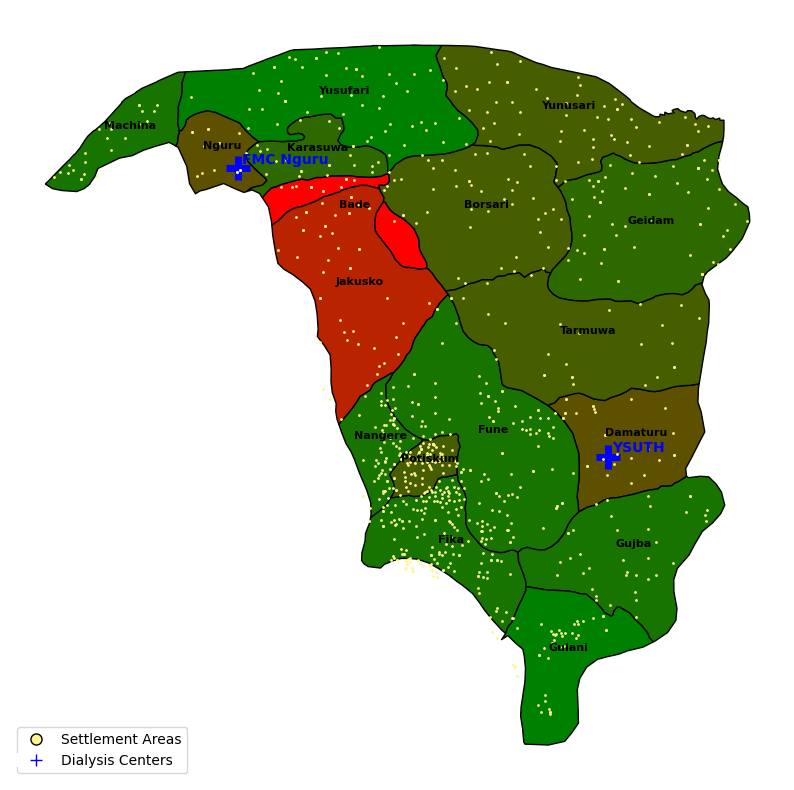

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Load your Yobe GeoDataFrame
 # Replace 'path_to_your_shapefile.shp' with the actual path to your Yobe shapefile.

# Define the pin locations
locations = [
    {'name': 'YSUTH', 'lat': 11.73800299, 'lon': 11.92202126},
    {'name': 'FMC Nguru', 'lat': 12.887077, 'lon': 10.4446767}
]

vmin = 0
vmax = 11

cmap = mcolors.LinearSegmentedColormap.from_list('CustomColormap', ['green', 'red'], N=vmax-vmin+1)

# Create a web map with the Stamen Terrain tile provider and projection
ax = Yobe.plot(column='COL', cmap=cmap, edgecolor='k', figsize=(10, 8), vmin=0, vmax=11)

# Add labels for each local government area
for x, y, label in zip(Yobe.geometry.centroid.x, Yobe.geometry.centroid.y, Yobe['NAME_2']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, weight='bold', ha='center')

# Add pins and labels for the GPS locations
for location in locations:
    lat, lon = location['lat'], location['lon']
    name = location['name']
    ax.scatter(lon, lat, color='blue', marker='+', lw=5, s=300)  # Use a single '+' marker for Dialysis Centers
    ax.annotate(name, xy=(lon, lat), xytext=(3, 3), textcoords="offset points", fontsize=10, weight='bold', color='blue')

# Plot your GeoDataFrame representing settlement areas
# Replace 'settlement_areasYobe' with the actual GeoDataFrame containing your settlement areas
settlement_areasYobe.plot(ax=ax, color='#FFF68F', markersize=1)

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Settlement Areas', markersize=8, markerfacecolor='#FFF68F', markeredgecolor='k'),
    Line2D([0], [0], marker='+', color='w', label='Dialysis Centers', markersize=8, markerfacecolor='blue', markeredgecolor='blue', lw=10)
]

# Add a legend at the bottom left
ax.legend(handles=legend_handles, loc='lower left')

# Adjust plot settings
fig = plt.gcf()
ax.set_axis_off()
fig.set_size_inches(10, 10)
plt.savefig('Loc_Yobe_Settlement.png', bbox_inches='tight', dpi=300)

# Show the map
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()


In [8]:
Borno = Nigeria[Nigeria['NAME_1'] == 'Borno']

# Assign values to the 'COL2' column
Borno['COL2'] = [0,	6,	2,	3,	4,	2,	3,	2,	2,	1,	5,	7,	2,	1,	2,	1,	1,	1,	0,	2,	1,	1,	0,	0,	1,	1,	0,	0,]
settlement_areasBorno = settlement_areas[settlement_areas['ADM1_NAME'] == 'Borno']

/Users/suleimanhamidukwairanga/anaconda3/envs/stat/lib/python3.11/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_8374/2403580219.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(Borno.geometry.centroid.x, Borno.geometry.centroid.y, Borno['NAME_2']):


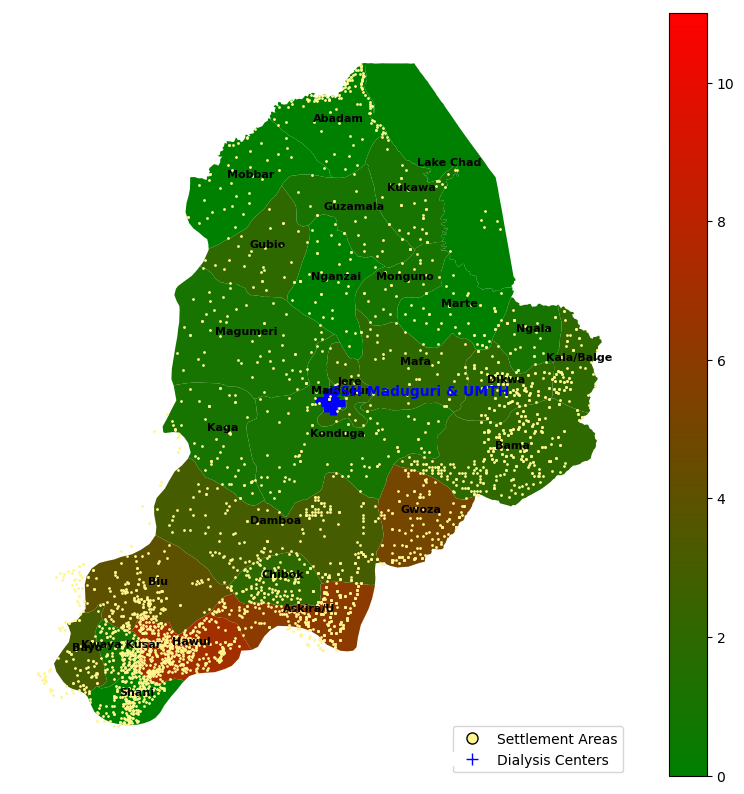

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Load your Borno GeoDataFrame
 # Replace 'path_to_your_shapefile.shp' with the actual path to your Borno shapefile.

# Define the pin locations
locations = [
    {'name': '', 'lat': 11.8223376669, 'lon': 13.1829379049},
    {'name': 'SSH Maduguri & UMTH', 'lat': 11.83886, 'lon': 13.14916}
]

vmin = 0
vmax = 11

cmap = mcolors.LinearSegmentedColormap.from_list('CustomColormap', ['green', 'red'], N=vmax-vmin+1)

# Create a web map with the Stamen Terrain tile provider and projection
ax = Borno.plot(column='COL2', cmap=mcolors.LinearSegmentedColormap.from_list('CustomColormap', ['green', 'red']), figsize=(10, 10), legend=True, legend_kwds={'shrink': 0.99}, vmin=0, vmax=11)

# Add labels for each local government area
for x, y, label in zip(Borno.geometry.centroid.x, Borno.geometry.centroid.y, Borno['NAME_2']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, weight='bold', ha='center')

# Add pins and labels for the GPS locations
for location in locations:
    lat, lon = location['lat'], location['lon']
    name = location['name']
    ax.scatter(lon, lat, color='blue', marker='+', lw=5, s=300)  # Use a single '+' marker for Dialysis Centers
    ax.annotate(name, xy=(lon, lat), xytext=(3, 3), textcoords="offset points", fontsize=10, weight='bold', color='blue')

# Plot your GeoDataFrame representing settlement areas
# Replace 'settlement_areasBorno' with the actual GeoDataFrame containing your settlement areas
settlement_areasBorno.plot(ax=ax, color='#FFF68F', markersize=1)

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Settlement Areas', markersize=8, markerfacecolor='#FFF68F', markeredgecolor='k'),
    Line2D([0], [0], marker='+', color='w', label='Dialysis Centers', markersize=8, markerfacecolor='blue', markeredgecolor='blue', lw=10)
]

# Add a legend at the bottom left
ax.legend(handles=legend_handles, loc='lower right')

# Adjust plot settings
fig = plt.gcf()
ax.set_axis_off()
fig.set_size_inches(10, 10)
plt.savefig('Loc_Borno_Settlement.png', bbox_inches='tight', dpi=300)

# Show the map
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()

In [10]:
settlement_areasJigawa = settlement_areas[settlement_areas['ADM1_NAME'] == 'Jigawa']
Jigawa = (Nigeria[Nigeria['NAME_1'] ==  'Jigawa'])
Jigawa['COL'] = [1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	5,	0,	0,	0,	0,	0,	1,	0,	2,	0,	0,	0,	0,	0,	0,]

/Users/suleimanhamidukwairanga/anaconda3/envs/stat/lib/python3.11/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_8374/3816074355.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(Jigawa.geometry.centroid.x, Jigawa.geometry.centroid.y, Jigawa['NAME_2']):


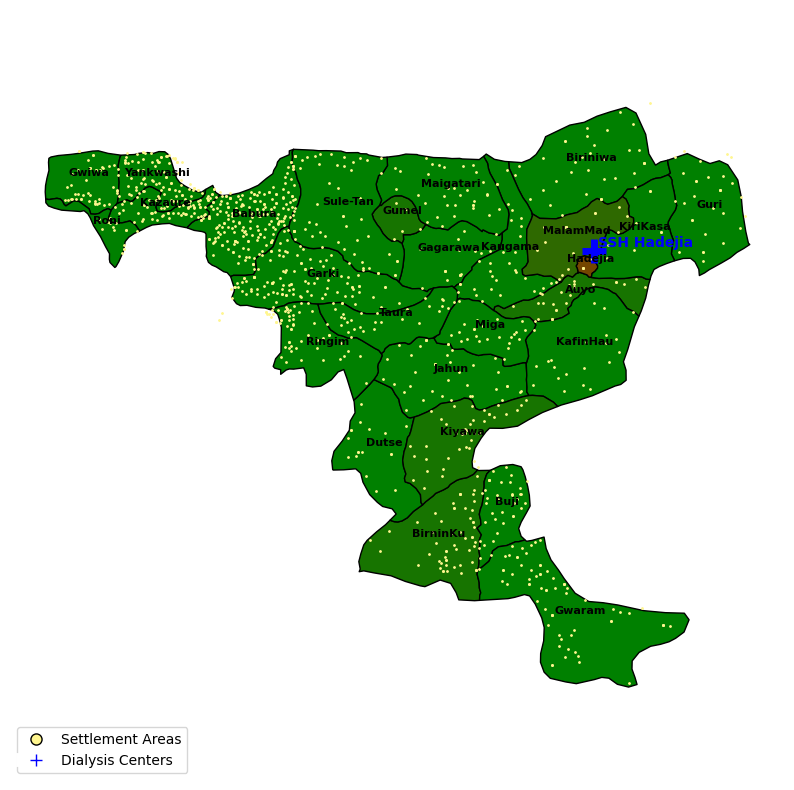

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Load your Jigawa GeoDataFrame
 # Replace 'path_to_your_shapefile.shp' with the actual path to your Jigawa shapefile.

# Define the pin locations
locations = [
    {'name': 'SSH Hadejia', 'lat': 12.4792, 'lon': 10.0573}
]

vmin = 0
vmax = 11

cmap = mcolors.LinearSegmentedColormap.from_list('CustomColormap', ['green', 'red'], N=vmax-vmin+1)

# Create a web map with the Stamen Terrain tile provider and projection
ax = Jigawa.plot(column='COL', cmap=cmap, edgecolor='k', figsize=(10, 8), vmin=0, vmax=11)

# Add labels for each local government area
for x, y, label in zip(Jigawa.geometry.centroid.x, Jigawa.geometry.centroid.y, Jigawa['NAME_2']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, weight='bold', ha='center')

# Add pins and labels for the GPS locations
for location in locations:
    lat, lon = location['lat'], location['lon']
    name = location['name']
    ax.scatter(lon, lat, color='blue', marker='+', lw=5, s=300)  # Use a single '+' marker for Dialysis Centers
    ax.annotate(name, xy=(lon, lat), xytext=(3, 3), textcoords="offset points", fontsize=10, weight='bold', color='blue')

# Plot your GeoDataFrame representing settlement areas
# Replace 'settlement_areasJigawa' with the actual GeoDataFrame containing your settlement areas
settlement_areasJigawa.plot(ax=ax, color='#FFF68F', markersize=1)

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Settlement Areas', markersize=8, markerfacecolor='#FFF68F', markeredgecolor='k'),
    Line2D([0], [0], marker='+', color='w', label='Dialysis Centers', markersize=8, markerfacecolor='blue', markeredgecolor='blue', lw=10)
]

# Add a legend at the bottom left
ax.legend(handles=legend_handles, loc='lower left')

# Adjust plot settings
fig = plt.gcf()
ax.set_axis_off()
fig.set_size_inches(10, 10)
plt.savefig('Loc_Jigawa_Settlement.png', bbox_inches='tight', dpi=300)

# Show the map
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()

In [50]:
Jigawa

ID_0  ISO   NAME_0  ID_1  NAME_1  ID_2     NAME_2  CCN_2  \
320   163  NGA  Nigeria    18  Jigawa   321       Auyo      0   
321   163  NGA  Nigeria    18  Jigawa   322     Babura      0   
322   163  NGA  Nigeria    18  Jigawa   323   Biriniwa      0   
323   163  NGA  Nigeria    18  Jigawa   324   BirninKu      0   
324   163  NGA  Nigeria    18  Jigawa   325       Buji      0   
325   163  NGA  Nigeria    18  Jigawa   326      Dutse      0   
326   163  NGA  Nigeria    18  Jigawa   327   Gagarawa      0   
327   163  NGA  Nigeria    18  Jigawa   328      Garki      0   
328   163  NGA  Nigeria    18  Jigawa   329      Gumel      0   
329   163  NGA  Nigeria    18  Jigawa   330       Guri      0   
330   163  NGA  Nigeria    18  Jigawa   331     Gwaram      0   
331   163  NGA  Nigeria    18  Jigawa   332      Gwiwa      0   
332   163  NGA  Nigeria    18  Jigawa   333    Hadejia      0   
333   163  NGA  Nigeria    18  Jigawa   334      Jahun      0   
334   163  NGA  Nigeria    18  Jigawa   335   KafinHau      0   
335   163  NGA  Nigeria    18  Jigawa   336    Kaugama      0   
336   163  NGA  Nigeria    18  Jigawa   337    Kazaure      0   
337   163  NGA  Nigeria    18  Jigawa   338   KiriKasa      0   
338   163  NGA  Nigeria    18  Jigawa   339     Kiyawa      0   
339   163  NGA  Nigeria    18  Jigawa   340  Maigatari      0   
340   163  NGA  Nigeria    18  Jigawa   341   MalamMad      0   
341   163  NGA  Nigeria    18  Jigawa   342       Miga      0   
342   163  NGA  Nigeria    18  Jigawa   343     Ringim      0   
343   163  NGA  Nigeria    18  Jigawa   344       Roni      0   
344   163  NGA  Nigeria    18  Jigawa   345   Sule-Tan      0   
345   163  NGA  Nigeria    18  Jigawa   346      Taura      0   
346   163  NGA  Nigeria    18  Jigawa   347  Yankwashi      0   

              TYPE_2        ENGTYPE_2       VARNAME_2  HASC_2  CCA_2  \
320  Local Authority  Local Authority             NaN     NaN    NaN   
321  Local Authority  Local Authority             NaN     NaN    NaN   
322  Local Authority  Local Authority             NaN     NaN    NaN   
323  Local Authority  Local Authority     Birnin Kudu     NaN    NaN   
324  Local Authority  Local Authority             NaN     NaN    NaN   
325  Local Authority  Local Authority             NaN     NaN    NaN   
326  Local Authority  Local Authority             NaN     NaN    NaN   
327  Local Authority  Local Authority             NaN     NaN    NaN   
328  Local Authority  Local Authority             NaN     NaN    NaN   
329  Local Authority  Local Authority             NaN     NaN    NaN   
330  Local Authority  Local Authority             NaN     NaN    NaN   
331  Local Authority  Local Authority             NaN     NaN    NaN   
332  Local Authority  Local Authority             NaN     NaN    NaN   
333  Local Authority  Local Authority             NaN     NaN    NaN   
334  Local Authority  Local Authority     Kafin Hausa     NaN    NaN   
335  Local Authority  Local Authority             NaN     NaN    NaN   
336  Local Authority  Local Authority             NaN     NaN    NaN   
337  Local Authority  Local Authority    Kiri Kasamma     NaN    NaN   
338  Local Authority  Local Authority             NaN     NaN    NaN   
339  Local Authority  Local Authority             NaN     NaN    NaN   
340  Local Authority  Local Authority    Malam Maduri     NaN    NaN   
341  Local Authority  Local Authority             NaN     NaN    NaN   
342  Local Authority  Local Authority             NaN     NaN    NaN   
343  Local Authority  Local Authority             NaN     NaN    NaN   
344  Local Authority  Local Authority  Sule Tankarkar     NaN    NaN   
345  Local Authority  Local Authority             NaN     NaN    NaN   
346  Local Authority  Local Authority             NaN     NaN    NaN   

     NL_NAME_2                                           geometry  COL  
320        NaN  POLYGON ((10.21653 12.24804, 10.22490 12.26735...    2  
321        NaN  POLYG

In [57]:
from PIL import Image

# Load the three images
image1 = Image.open('Loc_Jigawa_Settlement.png')
image2 = Image.open('Loc_Yobe_Settlement.png')
image3 = Image.open('Loc_Borno_Settlement.png')

# Make sure the images have the same height
min_height = min(image1.size[1], image2.size[1], image3.size[1])
image1 = image1.crop((0, 0, image1.size[0], min_height))
image2 = image2.crop((0, 0, image2.size[0], min_height))
image3 = image3.crop((0, 0, image3.size[0], min_height))

# Concatenate the images horizontally
result_image = Image.new('RGB', (image1.width + image2.width + image3.width, min_height))
result_image.paste(image1, (0, 0))
result_image.paste(image2, (image1.width, 0))
result_image.paste(image3, (image1.width + image2.width, 0))

# Save the concatenated image
result_image.save('Concatenated_Settlement.png')

# Show the concatenated image
result_image.show()

In [ ]:
import cv2
import numpy as np

# Load the three images
image1 = cv2.imread('Loc_Jigawa_Settlement.png')
image2 = cv2.imread('Loc_Yobe_Settlement.png')
image3 = cv2.imread('Loc_Borno_Settlement.png')

# Make sure the images have the same height
min_height = min(image1.shape[0], image2.shape[0], image3.shape[0])
image1 = image1[:min_height, ...]
image2 = image2[:min_height, ...]
image3 = image3[:min_height, ...]

# Concatenate the images horizontally
concatenated_image = np.hstack((image1, image2, image3))

# Save the concatenated image
cv2.imwrite('Concatenated_Settlement.png', concatenated_image)

# Show the concatenated image (optional)
cv2.imshow('Concatenated Image', concatenated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the three images
image1 = cv2.imread('Loc_Jigawa_Settlement.png')
image2 = cv2.imread('Loc_Yobe_Settlement.png')
image3 = cv2.imread('Loc_Borno_Settlement.png')

# Determine the minimum height among the three images
min_height = min(image1.shape[0], image2.shape[0], image3.shape[0])

# Resize the images to have the same height
image1_resized = cv2.resize(image1, (int(image1.shape[1] * min_height / image1.shape[0]), min_height))
image2_resized = cv2.resize(image2, (int(image2.shape[1] * min_height / image2.shape[0]), min_height))
image3_resized = cv2.resize(image3, (int(image3.shape[1] * min_height / image3.shape[0]), min_height))

# Concatenate the resized images horizontally
concatenated_image = np.hstack((image1_resized, image2_resized, image3_resized))

# Save the concatenated image
cv2.imwrite('Concatenated_Settlement.png', concatenated_image)

# Show the concatenated image (optional)
cv2.imshow('Concatenated Image', concatenated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
Nigeria = gpd.read_file('nigeria_state_boundaries.geojson')
df1_G = pd.read_csv('GPS.csv', encoding='latin-1')
df1_G['Number']=df1_G['Number'].apply(int)
gdf1 = gpd.GeoDataFrame(df1_G, geometry=gpd.points_from_xy(df1_G.Long, df1_G.Lat))

colors = ["#FFFFFF","#FFFFFF","#FFFFFF", "#3CB371","#006400","#4169E1","#000080","#D8BFD8","#800080"]
df = pd.read_csv('GPS.csv', encoding='latin-1')
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
cm = LinearSegmentedColormap.from_list('minard', colors)
scheme = mc.Quantiles(gdf2['Number'], k=2)
cm = LinearSegmentedColormap.from_list('minard', colors)
ax = gplt.webmap(Nigeria, projection=gcrs.WebMercator())
gplt.pointplot(
    gdf1, projection=gcrs.AlbersEqualArea(),
    scale='Number', limits=(4, 50), hue='Region', cmap=cm,legend=True,legend_kwargs={'bbox_to_anchor': (1.0, 0.7), 'frameon': False},
    ax=ax
)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.title('Number of Cases by Population' ,weight = "bold", fontsize=12)
plt.savefig('Loc_.png', bbox_inches = 'tight', dpi=300)